In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'bpm_and_spo2_final.csv', 'dataset.csv', 'Untitled.ipynb']


In [147]:
dataset = pd.read_csv("dataset.csv")

In [148]:
type(dataset)

pandas.core.frame.DataFrame

In [149]:
dataset.shape

(140, 5)

In [150]:
dataset.head(5)

,sex,base_bpm,max_bpm,Spo2,occurrence
0,1,145,150,43.0,0
1,1,130,187,50.0,1
2,0,130,172,50.0,0
3,1,120,178,53.0,1
4,0,120,163,46.0,0


In [151]:
dataset.sample(5)

,sex,base_bpm,max_bpm,Spo2,occurrence
96,1,150,125,75.0,0
32,1,130,188,56.0,1
27,1,110,123,45.0,0
101,1,140,151,55.0,0
93,1,130,140,50.0,0


In [152]:
dataset.describe()

,sex,base_bpm,max_bpm,Spo2,occurrence
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.571429,130.671429,160.821429,50.580286,0.342857
std,0.496649,14.620594,17.259454,10.688393,0.476369
min,0.000000,100.000000,114.000000,30.000000,0.000000
25%,0.000000,120.000000,148.750000,42.000000,0.000000
50%,1.000000,130.000000,162.000000,50.000000,0.000000
75%,1.000000,140.000000,174.000000,56.000000,1.000000
max,1.000000,172.000000,190.000000,81.300000,1.000000


In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         140 non-null    int64  
 1   base_bpm    140 non-null    int64  
 2   max_bpm     140 non-null    int64  
 3   Spo2        140 non-null    float64
 4   occurrence  140 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 5.6 KB


In [154]:
info = ["1:male,0:female","bpm during start","lactate threshold bpm","spo2 at lactate threshold","occurence: 1:might occurs, 0:might not occurs"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t"+info[i])

sex:		1:male,0:female
base_bpm:		bpm during start
max_bpm:		lactate threshold bpm
Spo2:		spo2 at lactate threshold
occurrence:		occurence: 1:might occurs, 0:might not occurs


In [155]:
dataset["occurrence"].describe()

count    140.000000
mean       0.342857
std        0.476369
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: occurrence, dtype: float64

In [156]:
dataset["occurrence"].unique()

array([0, 1], dtype=int64)

In [157]:
print(dataset.corr()["occurrence"].abs().sort_values(ascending=False))

occurrence    1.000000
max_bpm       0.703136
Spo2          0.202624
sex           0.139010
base_bpm      0.085971
Name: occurrence, dtype: float64


# Visualizing data

0    92
1    48
Name: occurrence, dtype: int64


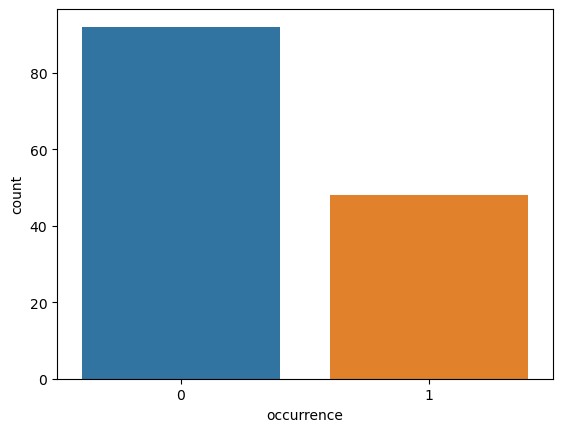

In [158]:
y = dataset["occurrence"]

sns.countplot(y)


target_temp = dataset.occurrence.value_counts()

print(target_temp)

In [159]:
print("Percentage of people without cramps: "+str(round(target_temp[0]*100/140,2)))
print("Percentage of people with cramps: "+str(round(target_temp[1]*100/140,2)))

Percentage of people without cramps: 65.71
Percentage of people with cramps: 34.29


<AxesSubplot:xlabel='sex', ylabel='occurrence'>

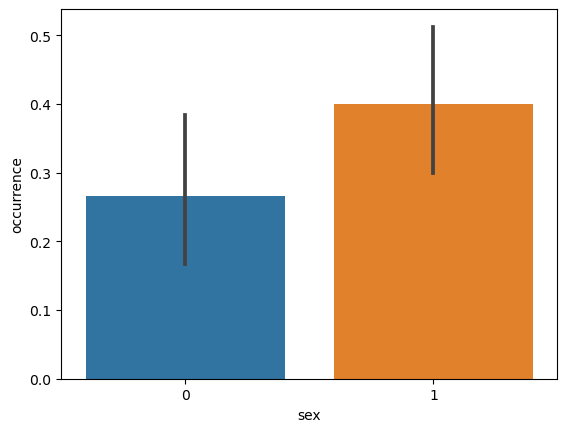

In [160]:
dataset["sex"].unique()
sns.barplot(dataset["sex"],y)

In [161]:
dataset["max_bpm"].describe()

count    140.000000
mean     160.821429
std       17.259454
min      114.000000
25%      148.750000
50%      162.000000
75%      174.000000
max      190.000000
Name: max_bpm, dtype: float64

In [162]:
dataset["max_bpm"].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 166, 169, 147, 184, 145, 155], dtype=int64)

<AxesSubplot:xlabel='max_bpm', ylabel='occurrence'>

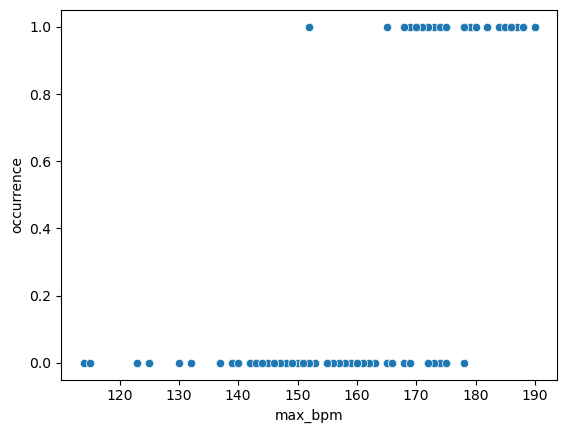

In [163]:
sns.scatterplot(dataset["max_bpm"],y)

In [164]:
dataset["Spo2"].describe()

count    140.000000
mean      50.580286
std       10.688393
min       30.000000
25%       42.000000
50%       50.000000
75%       56.000000
max       81.300000
Name: Spo2, dtype: float64

In [165]:
dataset["Spo2"].unique()

array([43.  , 50.  , 53.  , 46.  , 55.  , 47.  , 54.94, 41.  , 63.  ,
       61.  , 44.  , 62.5 , 60.  , 42.  , 35.  , 75.  , 45.  , 54.  ,
       40.  , 56.  , 59.69, 52.4 , 57.19, 48.12, 54.53, 51.73, 60.29,
       52.62, 77.52, 69.38, 49.92, 57.55, 54.41, 73.  , 54.04, 76.93,
       61.71, 46.56, 81.3 , 55.09, 74.21, 67.87, 63.04, 52.71, 63.07,
       64.33, 39.78, 42.4 , 65.62, 50.6 , 47.19, 53.32, 37.  , 30.  ,
       35.42, 36.63, 60.36, 59.  , 54.97, 36.  , 37.25, 35.36, 34.  ,
       36.45, 48.24, 39.  , 33.  ])

<AxesSubplot:xlabel='Spo2', ylabel='occurrence'>

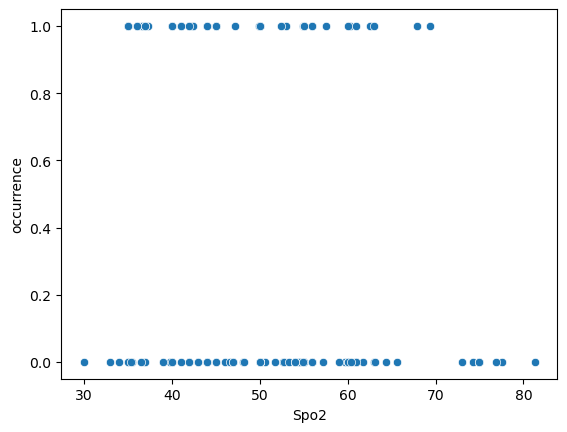

In [166]:
sns.scatterplot(dataset["Spo2"],y)

# Training And Testing

In [167]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("occurrence",axis=1)
target = dataset["occurrence"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [168]:
X_train.shape

(112, 4)

In [169]:
X_test.shape

(28, 4)

In [170]:
Y_train.shape

(112,)

In [171]:
Y_test.shape

(28,)

In [172]:
from sklearn.metrics import accuracy_score

# Implementing Random Forest Algorithm

In [ ]:


from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(300):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [174]:
Y_pred_rf.shape

(28,)

# Accuracy

In [176]:

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 85.71 %


# Thus we achieve a accuracy score of 85.71% using Random Forest Algorithm